### Name: Aayush Kamath <br> UNI: ak4808

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## YOUR CODE HERE
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/My Drive/ML_Climate/Data/Projected_impacts_datasheet.xlsx')
df.head()

,ID,Ref No,Source,Scale,Crop,Country,Site(location),Region,latitude,longitude,...,Planting time,Tillage,Others,Adaptation,Adaptation type,Reference,doi,Publication year,Note1 \n(* = corrected by HW),Note2 \n(* = Local temperature is estimated )
0,1,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.4167,73.0911,...,No,No,No,No,No,"Ahmad et al., 2020",10.1016/j.eja.2020.126040,2020,NaN,NaN
1,2,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.4167,73.0911,...,Yes,No,Yes,Yes,Combined,"Ahmad et al., 2020",10.1016/j.eja.2020.126040,2020,NaN,NaN
2,3,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.2705,-104.1080,...,No,No,No,No,No,"Burchfield et al., 2020",10.1007/s10584-019-02567-7,2020,NaN,*
3,4,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.2705,-104.1080,...,No,No,Yes,Yes,Others,"Burchfield et al., 2020",10.1007/s10584-019-02567-7,2020,NaN,*
4,5,3,SCOPUS-NewSearch,Regional,Maize,China,Hubei,Asia,30.0000,110.0000,...,No,No,No,No,No,"Chen et al., 2020",10.1016/j.agrformet.2019.107867,2020,NaN,NaN


##Data Preprocessing

In [4]:
num = [4] + [i for i in range(7,14)] + [i for i in range(15,20)] + [22] + [i for i in range(24,33)]

df_crop = df.iloc[:, num]
df_crop.head()

,Crop,Region,latitude,longitude,Current Average Temperature (℃),Future_Mid-point,Baseline_Mid-point,Time slice,Scenario source,Local delta T,...,Climate impacts per ℃ (%),CO2,CO2 ppm,Fertiliser,Irrigation,Cultivar,Soil organic matter management,Planting time,Tillage,Others
0,Maize,Asia,31.4167,73.0911,25.4543,2054,1995,MC,CMIP5,2.94,...,-6.671298,Yes,564.31311,No,No,No,No,No,No,No
1,Maize,Asia,31.4167,73.0911,25.4543,2054,1995,MC,CMIP5,2.94,...,4.765213,Yes,564.31311,Yes,No,Yes,No,Yes,No,Yes
2,Maize,North America,43.2705,-104.1080,10.1912,2055,1998,MC,CMIP5,NaN,...,-8.868124,Yes,570.51669,No,No,No,No,No,No,No
3,Maize,North America,43.2705,-104.1080,10.1912,2055,1998,MC,CMIP5,NaN,...,9.897460,Yes,570.51669,No,No,No,No,No,No,Yes
4,Maize,Asia,30.0000,110.0000,14.6521,2050,1983,MC,CMIP5,1.15,...,-4.675325,Yes,486.53532,No,No,No,No,No,No,No


In [5]:
df_crop.isnull().sum()

Crop                                             0
Region                                           0
latitude                                        37
longitude                                       37
Current Average Temperature (℃)                 37
Future_Mid-point                                 0
Baseline_Mid-point                               0
Time slice                                       0
Scenario source                                  0
Local delta T                                 4225
Local delta T from 2005                         37
Global delta T from pre-industrial period      518
Global delta T from 2005                       510
Climate impacts per ℃ (%)                        0
CO2                                              0
CO2 ppm                                        209
Fertiliser                                       0
Irrigation                                       0
Cultivar                                         0
Soil organic matter management 

In [6]:
df_crop=df_crop.drop(columns=['Local delta T '])
df_crop = df_crop.dropna(subset=['latitude', 'longitude','Current Average Temperature (℃)', 'Global delta T from pre-industrial period ', 'Global delta T from 2005','CO2 ppm'])

In [7]:
df_crop['Cultivar'] = df_crop['Cultivar'].str.strip()
df_crop['Scenario source'] = df_crop['Scenario source'].str.strip()


In [8]:
df_crop['Scenario source'].value_counts()

CMIP5     6766
CMIP3      840
Others     138
Name: Scenario source, dtype: int64

In [9]:
df_crop_cat = pd.get_dummies(df_crop, columns=['CO2','Fertiliser', 'Irrigation','Cultivar','Soil organic matter management','Planting time','Tillage','Others'],drop_first=True)


In [10]:
# df_crop_cat['Region'] = df_crop_cat['Region'].replace({'Asia':0, 'Europe':1, 'Africa':2, 'North America':3, 'Central and South America':'4','Australasia':5})
df_crop_cat['Scenario source'] = df_crop_cat['Scenario source'].replace({'CMIP5':0, 'CMIP3':1, 'Others':2})


In [11]:
df_crop_maize = df_crop_cat[df_crop_cat.Crop == 'Maize']
df_crop_rice = df_crop_cat[df_crop_cat.Crop == 'Rice']
df_crop_soybean = df_crop_cat[df_crop_cat.Crop == 'Soybean']
df_crop_wheat = df_crop_cat[df_crop_cat.Crop == 'Wheat']

In [12]:
df_crop_maize=df_crop_maize.drop(columns=['Crop'])
df_crop_rice=df_crop_rice.drop(columns=['Crop'])
df_crop_soybean=df_crop_soybean.drop(columns=['Crop'])
df_crop_wheat=df_crop_wheat.drop(columns=['Crop'])

##Data Exploration

In [ ]:
df_crop_maize

,Region,latitude,longitude,Current Average Temperature (℃),Future_Mid-point,Baseline_Mid-point,Time slice,Scenario source,Local delta T from 2005,Global delta T from pre-industrial period,...,Climate impacts per ℃ (%),CO2 ppm,CO2_Yes,Fertiliser_Yes,Irrigation_Yes,Cultivar_Yes,Soil organic matter management_Yes,Planting time_Yes,Tillage_Yes,Others_Yes
0,Asia,31.4167,73.0911,25.4543,2054,1995,MC,0,2.440000,2.50,...,-6.671298,564.31311,1,0,0,0,0,0,0,0
1,Asia,31.4167,73.0911,25.4543,2054,1995,MC,0,2.440000,2.50,...,4.765213,564.31311,1,1,0,1,0,1,0,1
2,North America,43.2705,-104.1080,10.1912,2055,1998,MC,0,2.228985,2.56,...,-8.868124,570.51669,1,0,0,0,0,0,0,0
3,North America,43.2705,-104.1080,10.1912,2055,1998,MC,0,2.228985,2.56,...,9.897460,570.51669,1,0,0,0,0,0,0,1
4,Asia,30.0000,110.0000,14.6521,2050,1983,MC,0,0.770000,1.46,...,-4.675325,486.53532,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,North America,37.0902,-95.7129,15.5803,2055,1975,MC,2,1.651535,2.50,...,-2.099196,560.00000,1,0,0,0,0,0,0,0
4271,North America,37.0902,-95.7129,15.5803,2025,1975,NF,2,0.600000,1.00,...,-3.833333,365.00000,1,0,0,0,0,0,0,0
4272,North America,37.0902,-95.7129,15.5803,2055,1975,MC,2,1.651535,2.50,...,-2.923881,560.00000,1,0,0,0,0,0,0,0
4273,North America,37.0902,-95.7129,15.5803,2085,1975,EC,2,4.426797,5.00,...,-2.710374,750.00000,1,0,0,0,0,0,0,0


In [13]:
df_crop_maize_new = df_crop_maize[df_crop_maize['Climate impacts per ℃ (%)'] > df_crop_maize['Climate impacts per ℃ (%)'].quantile(.15)]
df_crop_maize_new = df_crop_maize_new[df_crop_maize_new['Climate impacts per ℃ (%)'] < df_crop_maize_new['Climate impacts per ℃ (%)'].quantile(.90)]

In [14]:
df_crop_rice_new = df_crop_rice[df_crop_rice['Climate impacts per ℃ (%)'] > df_crop_rice['Climate impacts per ℃ (%)'].quantile(.05)]
df_crop_rice_new = df_crop_rice_new[df_crop_rice_new['Climate impacts per ℃ (%)'] < df_crop_rice_new['Climate impacts per ℃ (%)'].quantile(.95)]

In [15]:
df_crop_soybean_new = df_crop_soybean[df_crop_soybean['Climate impacts per ℃ (%)'] > df_crop_soybean['Climate impacts per ℃ (%)'].quantile(.10)]
df_crop_soybean_new = df_crop_soybean_new[df_crop_soybean_new['Climate impacts per ℃ (%)'] < df_crop_soybean_new['Climate impacts per ℃ (%)'].quantile(.95)]

In [16]:
df_crop_wheat_new = df_crop_wheat[df_crop_wheat['Climate impacts per ℃ (%)'] > df_crop_wheat['Climate impacts per ℃ (%)'].quantile(.10)]
df_crop_wheat_new = df_crop_wheat_new[df_crop_wheat_new['Climate impacts per ℃ (%)'] < df_crop_wheat_new['Climate impacts per ℃ (%)'].quantile(.95)]

In [ ]:
# df_crop_maize_new = df_crop_maize[df_crop_maize['Climate impacts per ℃ (%)'] < df_crop_maize['Climate impacts per ℃ (%)'].quantile(.05)]

In [17]:
list(df_crop_maize.columns)

['Region',
 'latitude',
 'longitude',
 'Current Average Temperature (℃)',
 'Future_Mid-point',
 'Baseline_Mid-point',
 'Time slice',
 'Scenario source',
 'Local delta T from 2005',
 'Global delta T from pre-industrial period ',
 'Global delta T from 2005',
 'Climate impacts per ℃ (%)',
 'CO2 ppm',
 'CO2_Yes',
 'Fertiliser_Yes',
 'Irrigation_Yes',
 'Cultivar_Yes',
 'Soil organic matter management_Yes',
 'Planting time_Yes',
 'Tillage_Yes',
 'Others_Yes']

In [37]:
result_mean_yield_m = df_crop_maize_new.groupby(['Region','Time slice'])['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_m = df_crop_maize_new.groupby(['Region', 'Time slice'])['Local delta T from 2005'].mean()

print(result_mean_yield_m,'\n')
print(result_mean_deltaT_m) 
index_m = result_mean_yield_m.index

Region                     Time slice
Africa                     EC           -3.828957
                           MC           -2.368123
                           NF           -1.634756
Asia                       EC           -2.979279
                           MC           -2.833353
                           NF           -2.108376
Central and South America  EC           -2.979433
                           MC           -2.263224
                           NF           -1.337363
Europe                     EC           -0.891893
                           MC           -0.585725
                           NF            0.022297
North America              EC           -3.106523
                           MC           -2.148409
                           NF           -1.006571
Name: Climate impacts per ℃ (%), dtype: float64 

Region                     Time slice
Africa                     EC            2.738084
                           MC            2.120411
                        

In [19]:
index_m.values.tolist()

[('Africa', 'EC'),
 ('Africa', 'MC'),
 ('Africa', 'NF'),
 ('Asia', 'EC'),
 ('Asia', 'MC'),
 ('Asia', 'NF'),
 ('Central and South America', 'EC'),
 ('Central and South America', 'MC'),
 ('Central and South America', 'NF'),
 ('Europe', 'EC'),
 ('Europe', 'MC'),
 ('Europe', 'NF'),
 ('North America', 'EC'),
 ('North America', 'MC'),
 ('North America', 'NF')]

In [20]:
result_mean_yield_m.values.tolist()

[-3.8289571716561555,
 -2.3681230806804,
 -1.6347562675881757,
 -2.979278660136986,
 -2.833352984328417,
 -2.1083764524335544,
 -2.9794332639019596,
 -2.263223819924386,
 -1.337363024968544,
 -0.8918933343273234,
 -0.585724577840005,
 0.02229660096965253,
 -3.1065229011818287,
 -2.14840943880477,
 -1.0065710035895474]

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Yield'),
 Text(0.5, 1.0, 'Region v/s % yield per ℃')]

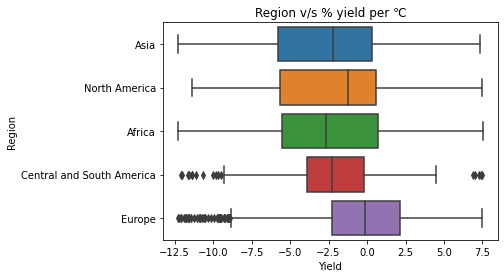

In [ ]:
sns.boxplot(data=df_crop_maize_new, x="Climate impacts per ℃ (%)", y="Region").set(title='Region v/s % yield per ℃', xlabel = 'Yield', ylabel = 'Region')

In [39]:
result_mean_yield_r = df_crop_rice_new.groupby(['Region','Time slice'])['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_r = df_crop_rice_new.groupby(['Region','Time slice'])['Local delta T from 2005'].mean()

print(result_mean_yield_r,'\n')
print(result_mean_deltaT_r)
index_r = result_mean_yield_r.index

Region                     Time slice
Africa                     EC           -0.788205
                           MC           -1.048465
                           NF            1.813210
Asia                       EC           -1.568276
                           MC           -0.266058
                           NF           -1.262193
Central and South America  EC            2.916791
                           MC            3.723860
                           NF            3.752639
Europe                     EC            0.493446
                           MC            3.485115
                           NF           -0.572974
North America              EC           -5.725193
                           MC           -5.051752
                           NF           -5.066355
Name: Climate impacts per ℃ (%), dtype: float64 

Region                     Time slice
Africa                     EC            3.400202
                           MC            1.859407
                        

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Yield'),
 Text(0.5, 1.0, 'Region v/s % yield per ℃')]

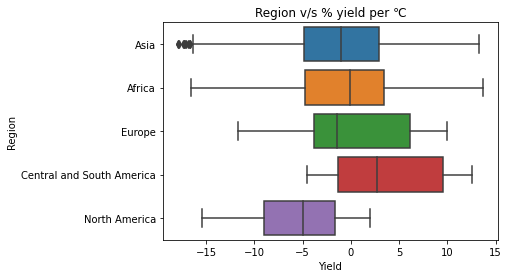

In [ ]:
sns.boxplot(data=df_crop_rice_new, x="Climate impacts per ℃ (%)", y="Region").set(title='Region v/s % yield per ℃', xlabel = 'Yield', ylabel = 'Region')

In [41]:
result_mean_yield_s = df_crop_soybean_new.groupby(['Region','Time slice'])['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_s = df_crop_soybean_new.groupby(['Region','Time slice'])['Local delta T from 2005'].mean()

print(result_mean_yield_s,'\n')
print(result_mean_deltaT_s)
index_s = result_mean_yield_s.index

Region                     Time slice
Asia                       EC            -9.703775
                           MC            -8.945809
                           NF            -2.567625
Central and South America  EC           -20.100921
                           MC           -21.629944
                           NF           -28.350457
North America              EC            -7.956194
                           MC            -5.894619
                           NF            -6.855642
Name: Climate impacts per ℃ (%), dtype: float64 

Region                     Time slice
Asia                       EC            2.797733
                           MC            1.517985
                           NF            1.026981
Central and South America  EC            2.530131
                           MC            1.095654
                           NF            0.742931
North America              EC            3.585521
                           MC            1.750358
               

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Yield'),
 Text(0.5, 1.0, 'Region v/s % yield per ℃')]

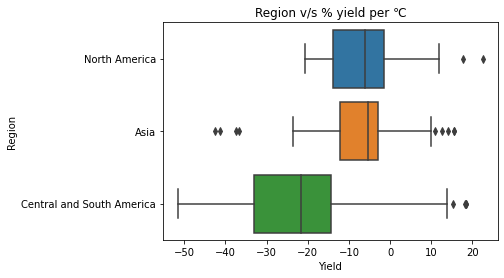

In [ ]:
sns.boxplot(data=df_crop_soybean_new, x="Climate impacts per ℃ (%)", y="Region").set(title='Region v/s % yield per ℃', xlabel = 'Yield', ylabel = 'Region')

In [43]:
result_mean_yield_w = df_crop_wheat_new.groupby(['Region','Time slice'])['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_w = df_crop_wheat_new.groupby(['Region','Time slice'])['Local delta T from 2005'].mean()

print(result_mean_yield_w,'\n')
print(result_mean_deltaT_w)
index_w = result_mean_yield_w.index

Region                     Time slice
Africa                     EC           -4.409069
                           MC           -3.835718
                           NF            2.355683
Asia                       EC           -1.858262
                           MC           -1.713009
                           NF           -3.334087
Australasia                EC           -5.992802
                           MC           -5.238154
                           NF           -3.419391
Central and South America  EC           -7.069706
                           MC           -6.773468
                           NF           -4.911317
Europe                     EC           -3.049332
                           MC           -5.013277
                           NF           -4.500415
North America              EC            1.505597
                           MC            0.663884
                           NF           -4.748460
Name: Climate impacts per ℃ (%), dtype: float64 

Region      

[Text(0, 0.5, 'Region'),
 Text(0.5, 0, 'Yield'),
 Text(0.5, 1.0, 'Region v/s % yield per ℃')]

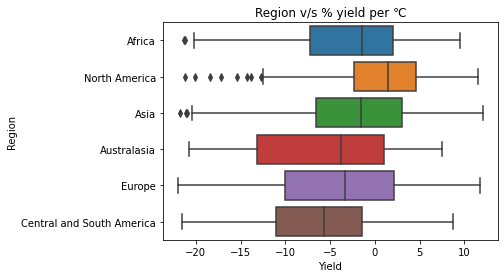

In [ ]:
sns.boxplot(data=df_crop_wheat_new, x="Climate impacts per ℃ (%)", y="Region").set(title='Region v/s % yield per ℃', xlabel = 'Yield', ylabel = 'Region')

<!-- ### Agriculture in 2050's:
Asia -> Decrease in yield of all 4 crops especially Soybean and Maize by 27% and 15% respectively <br>
Africa -> Decrease in yield of 3 crops (no soybean data) especially Wheat and Maize by 33% and 14% respectively <br>
Australasia -> Decrease in yield of Wheat by 14% <br>
Central and South America -> Decrease in yield of Wheat, Soybean and Maize by 34%, 31% and 18% and an increase of 6% in yield of Rice <br>
Europe -> A decrease of 7% in yield of Wheat and an increase of 7% in yield of Rice <br>
North America -> Marginal increase in yield of Wheat and a decrease of yield in Rice, Soybean and Maize by 11%, 13% and 6% repectively -->


#### Extrapolating all scenario's for 2050's (since it is the average future mid-point for the dataset)




In [24]:
def calc2(yield_c,delta,index):
  d = {}
  for i in range(len(yield_c)):
    val = ((1+(yield_c[i]/100))**(delta[i]))*100
    if(val>100):
      d[index[i]] = '{}% increase'.format(round(val-100),2)
    else:
      d[index[i]] = '{}% decrease'.format(round(100-val),2)
  
  return d

In [25]:
result_mean_yield_m = df_crop_maize_new.groupby('Region')['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_m = df_crop_maize_new.groupby('Region')['Local delta T from 2005'].mean()

print(result_mean_yield_m,'\n')
print(result_mean_deltaT_m) 
index_m = result_mean_yield_m.index
l = result_mean_yield_m.values.tolist()
T = result_mean_deltaT_m.values.tolist()
index = index_m.values.tolist()
print("Yield of Maize as compared to 2005:\n",calc2(l,T,index))

Region
Africa                      -2.583881
Asia                        -2.654355
Central and South America   -2.188679
Europe                      -0.475370
North America               -2.174140
Name: Climate impacts per ℃ (%), dtype: float64 

Region
Africa                       1.875098
Asia                         1.760714
Central and South America    1.745556
Europe                       1.963978
North America                2.245498
Name: Local delta T from 2005, dtype: float64
Yield of Maize as compared to 2005:
 {'Africa': '5% decrease', 'Asia': '5% decrease', 'Central and South America': '4% decrease', 'Europe': '1% decrease', 'North America': '5% decrease'}


In [26]:
result_mean_yield_r = df_crop_rice_new.groupby('Region')['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_r = df_crop_rice_new.groupby('Region')['Local delta T from 2005'].mean()

# print(result_mean_yield_m,'\n')
# print(result_mean_deltaT_m) 
index_r = result_mean_yield_r.index
l = result_mean_yield_r.values.tolist()
T = result_mean_deltaT_r.values.tolist()
index = index_r.values.tolist()
print("Yield of Rice as compared to 2005:\n",calc2(l,T,index))

Yield of Rice as compared to 2005:
 {'Africa': '1% decrease', 'Asia': '2% decrease', 'Central and South America': '6% increase', 'Europe': '0% increase', 'North America': '11% decrease'}


In [27]:
result_mean_yield_s = df_crop_soybean_new.groupby('Region')['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_s = df_crop_soybean_new.groupby('Region')['Local delta T from 2005'].mean()

# print(result_mean_yield_m,'\n')
# print(result_mean_deltaT_m) 
index_s = result_mean_yield_s.index
l = result_mean_yield_s.values.tolist()
T = result_mean_deltaT_s.values.tolist()
index = index_s.values.tolist()
print("Yield of Soybean as compared to 2005:\n",calc2(l,T,index))

Yield of Soybean as compared to 2005:
 {'Asia': '13% decrease', 'Central and South America': '31% decrease', 'North America': '13% decrease'}


In [28]:
result_mean_yield_w = df_crop_wheat_new.groupby('Region')['Climate impacts per ℃ (%)'].mean()
result_mean_deltaT_w = df_crop_wheat_new.groupby('Region')['Local delta T from 2005'].mean()

# print(result_mean_yield_m,'\n')
# print(result_mean_deltaT_m) 
index_w = result_mean_yield_w.index
l = result_mean_yield_w.values.tolist()
T = result_mean_deltaT_w.values.tolist()
index = index_w.values.tolist()
print("Yield of Wheat as compared to 2005:\n",calc2(l,T,index))

Yield of Wheat as compared to 2005:
 {'Africa': '6% decrease', 'Asia': '4% decrease', 'Australasia': '10% decrease', 'Central and South America': '11% decrease', 'Europe': '8% decrease', 'North America': '1% increase'}


###Time slice based calculation

In [34]:
def calc(yield_c,delta,index):
  d = {}
  for i in range(int(len(yield_c)/3)):
    d2 = {}
    for j in range(3):
      val = ((1+(yield_c[3*i+j]/100))**(delta[3*i+j]))*100
      if(val>100):
        d2[index[3*i+j][1]] = '{}% increase'.format(round(val-100),2)
      else:
        d2[index[3*i+j][1]] = '{}% decrease'.format(round(100-val),2)
    d[index[3*i+j][0]] = d2
  
  return d

In [36]:
l

[-3.066717078523092,
 -2.0868041852360566,
 -5.675951809069354,
 -6.232901569030236,
 -4.268417501059631,
 0.6611407634140409]

In [44]:
l = result_mean_yield_w.values.tolist()
T = result_mean_deltaT_w.values.tolist()
index = index_w.values.tolist()
print("Yield of Wheat as compared to 2005:\n",calc(l,T,index))

Yield of Wheat as compared to 2005:
 {'Africa': {'EC': '13% decrease', 'MC': '7% decrease', 'NF': '2% increase'}, 'Asia': {'EC': '5% decrease', 'MC': '3% decrease', 'NF': '3% decrease'}, 'Australasia': {'EC': '12% decrease', 'MC': '7% decrease', 'NF': '3% decrease'}, 'Central and South America': {'EC': '19% decrease', 'MC': '11% decrease', 'NF': '4% decrease'}, 'Europe': {'EC': '8% decrease', 'MC': '8% decrease', 'NF': '5% decrease'}, 'North America': {'EC': '4% increase', 'MC': '1% increase', 'NF': '6% decrease'}}


In [40]:
l = result_mean_yield_r.values.tolist()
T = result_mean_deltaT_r.values.tolist()
index = index_r.values.tolist()
print("Yield of Rice as compared to 2005:\n",calc(l,T,index))

Yield of Rice as compared to 2005:
 {'Africa': {'EC': '3% decrease', 'MC': '2% decrease', 'NF': '1% increase'}, 'Asia': {'EC': '4% decrease', 'MC': '0% decrease', 'NF': '1% decrease'}, 'Central and South America': {'EC': '8% increase', 'MC': '7% increase', 'NF': '3% increase'}, 'Europe': {'EC': '1% increase', 'MC': '2% increase', 'NF': '0% decrease'}, 'North America': {'EC': '16% decrease', 'MC': '10% decrease', 'NF': '6% decrease'}}


In [42]:
l = result_mean_yield_s.values.tolist()
T = result_mean_deltaT_s.values.tolist()
index = index_s.values.tolist()
print("Yield of Soybean as compared to 2005:\n",calc(l,T,index))

Yield of Soybean as compared to 2005:
 {'Asia': {'EC': '25% decrease', 'MC': '13% decrease', 'NF': '3% decrease'}, 'Central and South America': {'EC': '43% decrease', 'MC': '23% decrease', 'NF': '22% decrease'}, 'North America': {'EC': '26% decrease', 'MC': '10% decrease', 'NF': '8% decrease'}}


In [38]:
l = result_mean_yield_m.values.tolist()
T = result_mean_deltaT_m.values.tolist()
index = index_m.values.tolist()
print("Yield of Maize as compared to 2005:\n",calc(l,T,index))

Yield of Maize as compared to 2005:
 {'Africa': {'EC': '10% decrease', 'MC': '5% decrease', 'NF': '1% decrease'}, 'Asia': {'EC': '8% decrease', 'MC': '5% decrease', 'NF': '2% decrease'}, 'Central and South America': {'EC': '7% decrease', 'MC': '4% decrease', 'NF': '1% decrease'}, 'Europe': {'EC': '2% decrease', 'MC': '1% decrease', 'NF': '0% increase'}, 'North America': {'EC': '10% decrease', 'MC': '4% decrease', 'NF': '1% decrease'}}
